<a href="https://colab.research.google.com/github/TheScienceUniverse/Agro_GIS/blob/master/Agro_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Full GitHub Repository Here
!pwd
!ls
!rm -rf Agro_GIS
!git clone https://github.com/TheScienceUniverse/Agro_GIS.git

/content
sample_data
Cloning into 'Agro_GIS'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 118 (delta 7), reused 0 (delta 0), pack-reused 100
Receiving objects: 100% (118/118), 2.42 MiB | 2.58 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [0]:
# importing csv module
import csv

# csv File NAME
f_name = "Agro_GIS/data/agro.csv"

# initializing the titles and rows list
fields = []
rows = []

# reading CSV File
with open(f_name, 'r') as f_csv:
	# creating a CSV Reader object
	r_csv = csv.reader(f_csv)
	# Line COUNT
	l_count = 0
	# read row-by-row
	for row in r_csv:
		# print(row)
		l_count += 1
	print("Total Number of Rows: ", l_count)
f_csv.close()

In [0]:
!sh Agro_GIS/setup.sh

In [0]:
import numpy as p_nm
import scipy as p_sc
import matplotlib as p_mp

import cv2 as p_cv

print("Done")

Done


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

"""
m = Basemap(projection="mill", \
           llcrnrlat=-90, urcrnrlat=90, \
           llcrnrlon=-180, urcrnrlon=180,\
           resolution='c')

m.drawcoastlines()
m.fillcontinents()

m.drawmapboundary()
plt.title('Quick basemap example!')
plt.show()
"""

1024 1024 4
False


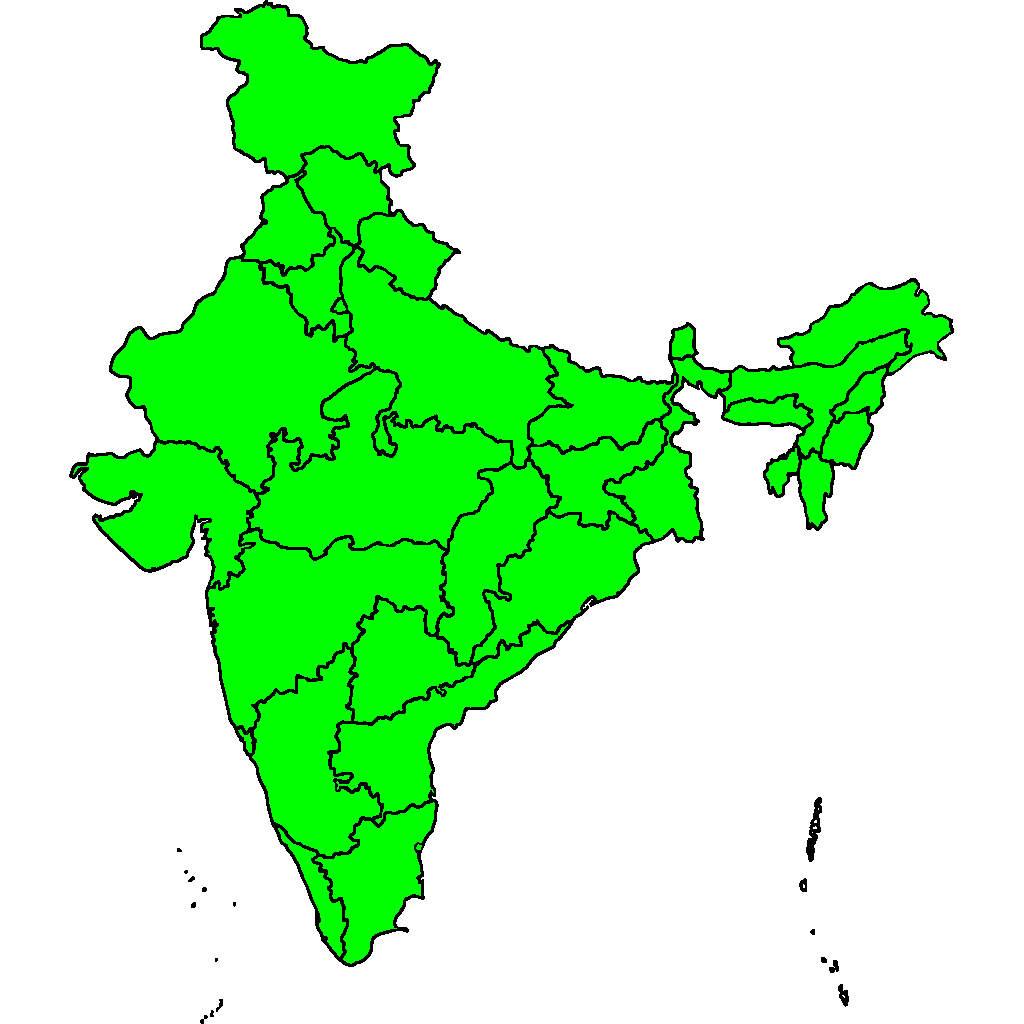

In [36]:
import sys as p_ss
import numpy as p_np
import cv2 as p_cv
from matplotlib import pyplot as p_pt
# from Agro_GIS.mylib import mylib as p_ml

img = p_cv.imread('Agro_GIS/img/india.png', -1)
ih, iw, ic = img.shape
print(ih, iw, ic)

C = [
[708, 440], [352, 832], [384, 786], [408, 592], [552, 480],
[736, 242], [480, 200], [234, 334], [228, 348], [110, 272],
[484, 592], [818, 274], [948, 334], [484, 352], [622, 213],
[440, 846], [414, 778], [472, 815], [408, 854], [576, 608],
[234, 332], [360, 296], [350, 686], [810, 434], [640, 384],
[466, 774], [384, 432], [248, 368], [516, 682], [854, 812],
[234, 326], [584, 216], [582, 212], [308, 342], [906, 194],
[848, 420]]

def comp_col(c0, c1):
	return c0[0] == c1[0] and c0[1] == c1[1] and c0[2] == c1[2]

print(comp_col([0, 0, 0], [0, 0, 1]))
    
class Queue:
	def __init__(self):
		self.items = []
	def is_empty(self):
		return self.items == []
	def enQueue(self, data):
		self.items.append(data)
	def deQueue(self):
		return self.items.pop(0)

def flood_fill (p, c):
	c.append(255)
	Q = Queue()
	Q.enQueue(p)
	while (not Q.is_empty()):
		p = Q.deQueue()
		if img[p[0]][p[1]][3] == 0:
			img[p[0]][p[1]] = c
			Q.enQueue([p[0] - 1, p[1] - 1])
			Q.enQueue([p[0] - 1, p[1]])
			Q.enQueue([p[0] - 1, p[1] + 1])
			Q.enQueue([p[0], p[1] - 1])
			Q.enQueue([p[0], p[1] + 1])
			Q.enQueue([p[0] + 1, p[1] - 1])
			Q.enQueue([p[0] + 1, p[1]])
			Q.enQueue([p[0] + 1, p[1] + 1])

for i in range(len(C)):
	flood_fill([C[i][0] - 1, C[i][1] - 1], [0, 255, 0])
            
ret = p_cv.imwrite('./Agro_GIS/img/output.png', img)

from IPython.display import Image
Image('./Agro_GIS/img/output.png', width=512, height=512)